In [548]:
from datetime import date, datetime, timedelta

from binance.binance_k_line_repository import load_k_lines

interval_days = 18
interval_minutes = interval_days * 24 * 60
interval_date_from: date = date.today() - timedelta(days=3 + interval_days - 1)
interval_date_to: date = date.today() - timedelta(days=3)

symbol: str = "ETHUSDT"

raw_k_lines = load_k_lines(symbol, interval_date_from, interval_date_to)

display(raw_k_lines)

,open_timestamp_millis,open_price,high_price,low_price,close_price,volume,close_timestamp_millis,quote_asset_volume,trades_count,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1684108800000,1798.26,1798.59,1798.11,1798.29,1208.279,1684108859999,2.172838e+06,1344,642.931,1.156163e+06,0
1,1684108860000,1798.29,1799.11,1798.29,1798.71,2222.283,1684108919999,3.997295e+06,1419,1345.506,2.420192e+06,0
2,1684108920000,1798.71,1798.95,1798.29,1798.93,517.526,1684108979999,9.308397e+05,862,239.884,4.314374e+05,0
3,1684108980000,1798.93,1799.41,1798.93,1799.34,774.054,1684109039999,1.392696e+06,751,586.488,1.055215e+06,0
4,1684109040000,1799.33,1799.45,1799.24,1799.44,450.869,1684109099999,8.112646e+05,589,335.008,6.027932e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1685663700000,1859.88,1859.88,1859.54,1859.74,419.674,1685663759999,7.804788e+05,834,179.291,3.334214e+05,0
1436,1685663760000,1859.74,1860.09,1859.74,1860.03,409.641,1685663819999,7.619012e+05,641,291.108,5.414248e+05,0
1437,1685663820000,1860.02,1860.13,1859.70,1860.13,672.830,1685663879999,1.251400e+06,791,341.969,6.360135e+05,0
1438,1685663880000,1860.13,1860.71,1860.12,1860.54,380.460,1685663939999,7.078353e+05,832,307.614,5.723063e+05,0


In [549]:
import pandas as pd

k_lines = raw_k_lines[["close_price"]]
k_lines.index = pd.to_datetime(raw_k_lines["open_timestamp_millis"], unit="ms")
k_lines.index.name = "open_datetime"

k_lines

,close_price
open_datetime,
2023-05-15 00:00:00,1798.29
2023-05-15 00:01:00,1798.71
2023-05-15 00:02:00,1798.93
2023-05-15 00:03:00,1799.34
2023-05-15 00:04:00,1799.44
...,...
2023-06-01 23:55:00,1859.74
2023-06-01 23:56:00,1860.03
2023-06-01 23:57:00,1860.13


In [550]:
from numpy import float16, float64

# TODO: revivce disabled validations

# assert len(k_lines) == interval_minutes

assert len(k_lines[k_lines.isna().any(axis=1)]) == 0
assert len(k_lines[k_lines.isnull().any(axis=1)]) == 0

assert k_lines.dtypes["close_price"] == float64
assert len(k_lines[k_lines["close_price"] <= 0]) == 0

# display(
#     (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     ).value_counts()

# )

# assert (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     == 60
# ).all()

<Axes: xlabel='open_datetime'>

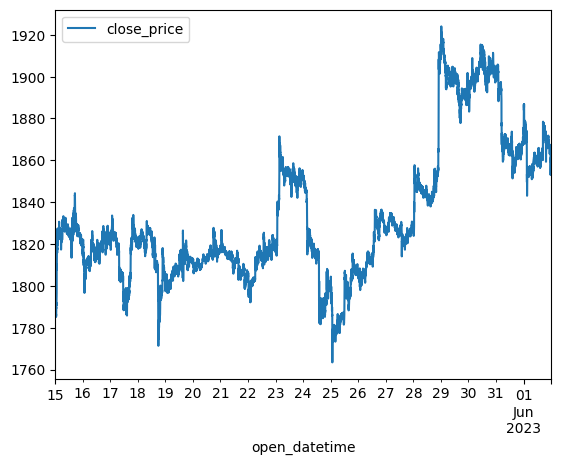

In [551]:
k_lines.plot.line(use_index=True)

In [552]:
k_lines_features = k_lines.copy()

k_lines_features["previous_close_price_mean_1_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(1).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).mean()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_std_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).std()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_min_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).min()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_max_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).max()
    / k_lines_features["close_price"]
)


k_lines_features["is_next_close_price_greater"] = (
    k_lines_features["close_price"]
    .shift(-1)
    .rolling(2)
    .apply(lambda x: x.iloc[1] > x.iloc[0])
)

k_lines_features.dropna(inplace=True)

display(k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-15 00:16:00,1790.91,1.001402,1.002784,1.003463,1.003456,1.003853,0.001954,0.001426,0.000945,0.000815,1.001402,1.001402,1.001402,1.001402,1.004165,1.004607,1.004607,1.004763,1.0
2023-05-15 00:17:00,1791.63,0.999598,1.000299,1.002141,1.002625,1.003192,0.000991,0.002210,0.001545,0.001256,0.999598,0.999598,0.999598,0.999598,1.000999,1.004203,1.004203,1.004359,1.0
2023-05-15 00:18:00,1791.74,0.999939,0.999738,1.001028,1.002179,1.002884,0.000284,0.001876,0.001781,0.001467,0.999537,0.999537,0.999537,0.999537,0.999939,1.003700,1.004141,1.004297,1.0
2023-05-15 00:19:00,1792.55,0.999548,0.999517,0.999651,1.001319,1.002180,0.000043,0.000593,0.001869,0.001598,0.999487,0.999085,0.999085,0.999085,0.999548,1.000485,1.003687,1.003844,0.0
2023-05-15 00:20:00,1792.25,1.000167,0.999941,0.999697,1.001205,1.002111,0.000320,0.000375,0.001878,0.001624,0.999715,0.999252,0.999252,0.999252,1.000167,1.000167,1.003855,1.004012,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01 23:54:00,1859.88,1.000140,1.000229,1.000286,1.000153,0.999909,0.000125,0.000099,0.000293,0.000550,1.000140,1.000140,0.999527,0.998871,1.000317,1.000360,1.000376,1.000833,0.0
2023-06-01 23:55:00,1859.74,1.000075,1.000145,1.000272,1.000181,1.000054,0.000099,0.000157,0.000282,0.000478,1.000075,1.000075,0.999602,0.998946,1.000215,1.000403,1.000436,1.000909,1.0
2023-06-01 23:56:00,1860.03,0.999844,0.999882,1.000015,0.999985,0.999931,0.000053,0.000173,0.000282,0.000452,0.999844,0.999844,0.999446,0.998790,0.999919,1.000237,1.000280,1.000753,1.0


In [553]:
test_k_lines_ratio = 0.2
test_k_lines_count = round(test_k_lines_ratio * len(k_lines_features))

train_k_lines_features = k_lines_features.iloc[:-test_k_lines_count]
test_k_lines_features = k_lines_features.iloc[-test_k_lines_count:]

display(train_k_lines_features)
display(test_k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-15 00:16:00,1790.91,1.001402,1.002784,1.003463,1.003456,1.003853,0.001954,0.001426,0.000945,0.000815,1.001402,1.001402,1.001402,1.001402,1.004165,1.004607,1.004607,1.004763,1.0
2023-05-15 00:17:00,1791.63,0.999598,1.000299,1.002141,1.002625,1.003192,0.000991,0.002210,0.001545,0.001256,0.999598,0.999598,0.999598,0.999598,1.000999,1.004203,1.004203,1.004359,1.0
2023-05-15 00:18:00,1791.74,0.999939,0.999738,1.001028,1.002179,1.002884,0.000284,0.001876,0.001781,0.001467,0.999537,0.999537,0.999537,0.999537,0.999939,1.003700,1.004141,1.004297,1.0
2023-05-15 00:19:00,1792.55,0.999548,0.999517,0.999651,1.001319,1.002180,0.000043,0.000593,0.001869,0.001598,0.999487,0.999085,0.999085,0.999085,0.999548,1.000485,1.003687,1.003844,0.0
2023-05-15 00:20:00,1792.25,1.000167,0.999941,0.999697,1.001205,1.002111,0.000320,0.000375,0.001878,0.001624,0.999715,0.999252,0.999252,0.999252,1.000167,1.000167,1.003855,1.004012,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29 09:33:00,1902.35,0.999968,0.999855,0.999670,0.999547,0.999301,0.000160,0.000308,0.000242,0.000599,0.999742,0.999238,0.999238,0.998113,0.999968,0.999968,0.999968,1.000079,1.0
2023-05-29 09:34:00,1903.17,0.999569,0.999553,0.999430,0.999185,0.998988,0.000022,0.000143,0.000285,0.000531,0.999538,0.999301,0.998807,0.997746,0.999569,0.999569,0.999569,0.999648,1.0
2023-05-29 09:35:00,1903.27,0.999947,0.999732,0.999552,0.999257,0.999076,0.000305,0.000287,0.000392,0.000475,0.999517,0.999259,0.998755,0.997809,0.999947,0.999947,0.999947,0.999947,1.0


,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-29 09:38:00,1902.81,1.000263,1.000518,1.000367,0.999993,0.999637,0.000360,0.000272,0.000448,0.000508,1.000263,1.000189,0.999490,0.998996,1.000773,1.000773,1.000773,1.000773,0.0
2023-05-29 09:39:00,1902.66,1.000079,1.000210,1.000398,1.000135,0.999726,0.000186,0.000325,0.000399,0.000514,1.000079,1.000079,0.999580,0.999075,1.000342,1.000851,1.000851,1.000851,0.0
2023-05-29 09:40:00,1902.48,1.000095,1.000134,1.000413,1.000283,0.999854,0.000056,0.000385,0.000339,0.000513,1.000095,1.000095,0.999900,0.999170,1.000173,1.000946,1.000946,1.000946,1.0
2023-05-29 09:41:00,1902.88,0.999790,0.999837,0.999966,1.000085,0.999676,0.000067,0.000187,0.000324,0.000504,0.999790,0.999790,0.999721,0.998959,0.999884,1.000226,1.000736,1.000736,1.0
2023-05-29 09:42:00,1902.93,0.999974,0.999869,0.999883,1.000093,0.999702,0.000149,0.000093,0.000293,0.000491,0.999764,0.999764,0.999764,0.998933,0.999974,0.999974,1.000709,1.000709,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01 23:54:00,1859.88,1.000140,1.000229,1.000286,1.000153,0.999909,0.000125,0.000099,0.000293,0.000550,1.000140,1.000140,0.999527,0.998871,1.000317,1.000360,1.000376,1.000833,0.0
2023-06-01 23:55:00,1859.74,1.000075,1.000145,1.000272,1.000181,1.000054,0.000099,0.000157,0.000282,0.000478,1.000075,1.000075,0.999602,0.998946,1.000215,1.000403,1.000436,1.000909,1.0
2023-06-01 23:56:00,1860.03,0.999844,0.999882,1.000015,0.999985,0.999931,0.000053,0.000173,0.000282,0.000452,0.999844,0.999844,0.999446,0.998790,0.999919,1.000237,1.000280,1.000753,1.0


In [554]:
from sklearn.ensemble import RandomForestClassifier

model_input_columns = [
    "close_price",
    "previous_close_price_mean_1_ratio",
    "previous_close_price_mean_2_ratio",
    "previous_close_price_mean_4_ratio",
    "previous_close_price_mean_8_ratio",
    "previous_close_price_mean_16_ratio",
    "previous_close_price_std_2_ratio",
    "previous_close_price_std_4_ratio",
    "previous_close_price_std_8_ratio",
    "previous_close_price_std_16_ratio",
    "previous_close_price_min_2_ratio",
    "previous_close_price_min_4_ratio",
    "previous_close_price_min_8_ratio",
    "previous_close_price_min_16_ratio",
    "previous_close_price_max_2_ratio",
    "previous_close_price_max_4_ratio",
    "previous_close_price_max_8_ratio",
    "previous_close_price_max_16_ratio",
]
model_target_column = "is_next_close_price_greater"

model_train_input_values = train_k_lines_features[model_input_columns]
model_train_target_values = train_k_lines_features[model_target_column]
model_test_input_values = test_k_lines_features[model_input_columns]
model_test_target_values = test_k_lines_features[model_target_column]

model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=300,
    random_state=1,
)
model.fit(model_train_input_values, model_train_target_values)

model_test_predicted_values = pd.Series(
    model.predict(model_test_input_values), index=test_k_lines_features.index
)
model_train_predicted_values = pd.Series(
    model.predict(model_train_input_values), index=train_k_lines_features.index
)

model_test_predicted_values.name = f"predicted_{model_target_column}"
model_test_target_and_predicted_values = pd.concat(
    [model_test_target_values, model_test_predicted_values], axis=1
)
# display(model_test_target_and_predicted_values)

In [555]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

display(
    "test_accuracy_score = "
    + str(accuracy_score(model_test_target_values, model_test_predicted_values))
)

display(
    "train_accuracy_score = "
    + str(accuracy_score(model_train_target_values, model_train_predicted_values))
)

display(
    "test_precision_score = "
    + str(precision_score(model_test_target_values, model_test_predicted_values))
)

display(
    "train_precision_score = "
    + str(precision_score(model_train_target_values, model_train_predicted_values))
)


# display(precision_score(model_test_target_values, model_test_predicted_values))
# display(recall_score(model_test_target_values, model_test_predicted_values))
# display(f1_score(model_test_target_values, model_test_predicted_values))

'test_accuracy_score = 0.5138004246284501'

'train_accuracy_score = 0.6855515876845865'

'test_precision_score = 0.5283320031923384'

'train_precision_score = 0.7307179076594609'

In [556]:
display(
    pd.concat(
        [
            model_test_target_values.value_counts(),
            model_test_predicted_values.value_counts(),
        ],
        axis=1,
    )
)

,is_next_close_price_greater,predicted_is_next_close_price_greater
0.0,2591,3928
1.0,2590,1253
